# Benchmark QRT

This notebook illustrates a simple benchmark example that should help novice participants to start the competition.

## Used libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
#import matplotlib.pyplot as plt
#%matplotlib inline

## Loading data

The train and test inputs are composed of 46 features.

The target of this challenge is `RET` and corresponds to the fact that the **return is in the top 50% of highest stock returns**.

Since the median is very close to 0, this information should not change much with the idea to predict the sign of the return.

In [2]:
x_train = pd.read_csv('./x_train.csv', index_col='ID')
y_train = pd.read_csv('./y_train.csv', index_col='ID')
train = pd.concat([x_train, y_train], axis=1).dropna()
test = pd.read_csv('./x_test.csv', index_col='ID').dropna()
train.head()
#test.head()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20,RET
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,...,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937,True
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,...,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868,False
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,...,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458,False
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,...,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806,False
5,0,23,37,12,5,94,0.010938,-0.238878,0.021548,-0.322706,...,-0.062753,-0.004552,-0.097196,0.012677,-0.331521,0.032527,0.665084,0.008400,-0.037627,False


In [3]:
test

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
ID,,,,,,,,,,,,,,,,,,,,,
418595,2,0,37,12,5,94,0.020208,0.146176,0.010059,0.224756,...,0.022364,-0.301163,-0.001035,-0.416533,-0.000148,-0.004548,-0.000148,-0.161792,0.016997,-0.007221
418596,2,1,15,4,3,37,0.009134,-0.251631,0.021913,-0.712515,...,-0.002062,-0.679724,-0.001544,-0.408979,0.001546,0.396372,-0.007875,-0.431760,0.001742,-0.574228
418597,2,4,57,20,8,142,0.005008,-0.115845,0.005914,-0.107441,...,0.004458,-0.451590,0.011481,-0.536967,0.009520,-0.368585,0.000000,0.022713,-0.002066,-0.207362
418598,2,5,35,12,5,91,0.015370,-0.090295,-0.013738,0.048465,...,-0.010984,-0.039714,0.037018,0.665132,-0.003097,0.141991,-0.008191,-0.172382,0.005145,-0.353172
418599,2,6,57,20,8,142,0.011419,-0.289027,0.022807,-0.262690,...,0.001045,-0.565747,0.004304,-0.506291,-0.026469,-0.280666,0.010743,0.365773,-0.011134,0.933284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617019,222,5707,52,18,7,122,0.010188,-0.476830,-0.006419,-0.534137,...,-0.001028,-0.515748,0.019115,0.361119,-0.002090,-0.132224,0.015389,-0.014298,-0.008680,0.128657
617020,222,5710,33,10,4,83,-0.000838,-0.063269,-0.026928,0.532781,...,-0.007136,-0.203097,0.032965,0.108639,0.013488,-0.458271,0.019894,-0.353293,0.013513,-0.219671
617021,222,5714,49,17,7,113,0.005941,-0.506350,-0.016363,-0.173802,...,-0.016931,0.340198,0.002121,1.087437,-0.012910,1.791362,-0.057857,6.330687,-0.000493,1.175063


## Feature Engineering

The main drawback in this challenge would be to deal with the noise. To do that, we could create some feature that aggregate features with some statistics. 

The following cell computes statistics on a given target conditionally to some features. For example, we want to generate a feature that describe the mean of `RET_1` conditionally to the `SECTOR` and the `DATE`.

**Ideas of improvement**: change shifts, the conditional features, the statistics, and the target. 

In [28]:
data = pd.DataFrame()
# Feature engineering
new_features = []

# Conditional aggregated features
shifts = [20]  # Choose some different shifts
statistics = ['mean']  # the type of stat
gb_features = ['INDUSTRY_GROUP','DATE']
target_feature = 'RET'
tmp_name = '_'.join(gb_features)
for shift in shifts:
    for stat in statistics:
        name = f'{target_feature}_{shift}_{tmp_name}_{stat}'
        feat = f'{target_feature}_{shift}'
        new_features.append(name)
        for data in [train, test]:
            data[name] = data.groupby(gb_features)[feat].transform(stat)
            #print(feat)

In [29]:
new_features

['RET_20_INDUSTRY_GROUP_DATE_mean']

In [30]:
data

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20,RET_1_INDUSTRY_GROUP_DATE_mean,RET_2_INDUSTRY_GROUP_DATE_mean,RET_20_INDUSTRY_GROUP_DATE_mean
ID,,,,,,,,,,,,,,,,,,,,,
418595,2,0,37,12,5,94,0.020208,0.146176,0.010059,0.224756,...,-0.416533,-0.000148,-0.004548,-0.000148,-0.161792,0.016997,-0.007221,0.005990,0.005706,0.001142
418596,2,1,15,4,3,37,0.009134,-0.251631,0.021913,-0.712515,...,-0.408979,0.001546,0.396372,-0.007875,-0.431760,0.001742,-0.574228,0.002119,0.011234,-0.001463
418597,2,4,57,20,8,142,0.005008,-0.115845,0.005914,-0.107441,...,-0.536967,0.009520,-0.368585,0.000000,0.022713,-0.002066,-0.207362,0.003568,0.013193,0.006494
418598,2,5,35,12,5,91,0.015370,-0.090295,-0.013738,0.048465,...,0.665132,-0.003097,0.141991,-0.008191,-0.172382,0.005145,-0.353172,0.005990,0.005706,0.001142
418599,2,6,57,20,8,142,0.011419,-0.289027,0.022807,-0.262690,...,-0.506291,-0.026469,-0.280666,0.010743,0.365773,-0.011134,0.933284,0.003568,0.013193,0.006494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617019,222,5707,52,18,7,122,0.010188,-0.476830,-0.006419,-0.534137,...,0.361119,-0.002090,-0.132224,0.015389,-0.014298,-0.008680,0.128657,-0.004111,0.001865,0.001134
617020,222,5710,33,10,4,83,-0.000838,-0.063269,-0.026928,0.532781,...,0.108639,0.013488,-0.458271,0.019894,-0.353293,0.013513,-0.219671,-0.000520,-0.000252,0.011723
617021,222,5714,49,17,7,113,0.005941,-0.506350,-0.016363,-0.173802,...,1.087437,-0.012910,1.791362,-0.057857,6.330687,-0.000493,1.175063,-0.004610,0.002540,0.004738


/home/alextusnin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alextusnin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DATE', ylabel='RET_20_INDUSTRY_GROUP_DATE_mean'>

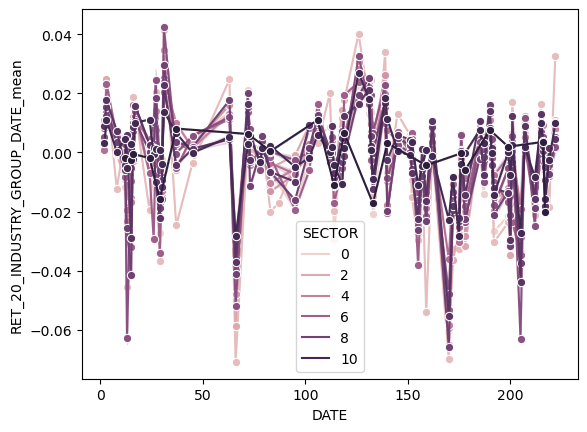

In [31]:
name = data.columns[-1]
sns.lineplot(
    data=data,
    x='DATE',
    y=name,
    hue='SECTOR',
    marker='o'
)

## Feature selection

To reduce the number of feature (and the noise) we only consider the 5 last days of `RET` and `VOLUME` in addition to the newly created feature.

In [32]:
target = 'RET'


n_shifts = 5  # If you don't want all the shifts to reduce noise
features = ['RET_%d' % (i + 16) for i in range(n_shifts)]
features += ['VOLUME_%d' % (i + 16) for i in range(n_shifts)]
features += new_features  # The conditional features
train[features].head()

,RET_16,RET_17,RET_18,RET_19,RET_20,VOLUME_16,VOLUME_17,VOLUME_18,VOLUME_19,VOLUME_20,RET_20_INDUSTRY_GROUP_DATE_mean
ID,,,,,,,,,,,
0,0.059459,0.003254,0.008752,-0.012959,-0.002155,0.630899,-0.379412,-0.110597,0.174521,-0.000937,0.000470
2,0.008964,-0.017612,-0.006562,-0.012101,-0.006867,-0.010336,-0.354333,-0.519391,-0.356157,-0.308868,0.001737
3,-0.031769,0.033824,-0.001468,-0.013520,-0.036745,0.012105,-0.290178,-0.663834,-0.562126,-0.631458,-0.010228
4,-0.038461,-0.012659,0.004237,0.004256,-0.040817,-0.277083,0.139086,-0.017547,0.579510,0.802806,-0.000339
5,0.025915,-0.004552,0.012677,0.032527,0.008400,-0.062753,-0.097196,-0.331521,0.665084,-0.037627,-0.000339


## Model and local score

A Random Forest (RF) model is chosen for the Benchmark. We consider a large number of tree with a quiet small depth. The missing values are simply filled with 0. A KFold is done on the dates (using `DATE`) for a local scoring of the model. 

**Ideas of improvements**: Tune the RF hyperparameters, deal with the missing values, change the features, consider another model, ...

In [9]:
train[features]

,RET_1,RET_2,RET_3,RET_4,RET_5,VOLUME_1,VOLUME_2,VOLUME_3,VOLUME_4,VOLUME_5,RET_1_INDUSTRY_GROUP_DATE_mean,RET_2_INDUSTRY_GROUP_DATE_mean
ID,,,,,,,,,,,,
0,-0.015748,-0.015504,0.010972,-0.014672,0.016483,0.147931,0.179183,0.033832,-0.362868,-0.972920,0.011659,-0.028772
2,0.000440,-0.058896,-0.009042,0.024852,0.009354,-0.096282,0.084771,-0.298777,-0.157421,0.091455,0.015639,-0.042368
3,0.031298,0.007756,-0.004632,-0.019677,0.003544,-0.429540,-0.089919,-0.639737,-0.940163,-0.882464,0.017253,0.001304
4,0.027273,-0.039302,0.000000,0.000000,0.022321,-0.847155,-0.943033,-1.180629,-1.313896,-1.204398,0.006536,-0.013366
5,0.010938,0.021548,-0.016097,-0.027120,-0.007958,-0.238878,-0.322706,0.747003,0.688104,-0.182443,0.006536,-0.013366
...,...,...,...,...,...,...,...,...,...,...,...,...
418590,0.021843,-0.021703,0.011141,0.021379,0.001727,-0.217823,-0.125333,-0.674800,-0.150397,-0.026910,0.017559,-0.009717
418591,-0.006920,0.000000,0.006968,0.009143,0.009226,-0.375251,-0.029437,3.189102,0.403533,-0.840418,0.016445,-0.012649
418592,0.021869,-0.005929,0.010989,0.006030,-0.015826,-0.978856,-1.026267,-0.724158,-0.784385,-0.701318,0.023727,-0.008081


In [34]:
X_train = train[features]
y_train = train[target]

# A quiet large number of trees with low depth to prevent overfits
rf_params = {
    'n_estimators': 500,
    'max_depth': 2**3,
    'random_state': 0,
    'n_jobs': -1
}

train_dates = train['DATE'].unique()
test_dates = test['DATE'].unique()

n_splits = 4
scores = []
models = []

splits = KFold(n_splits=n_splits, random_state=0,
               shuffle=True).split(train_dates)

for i, (local_train_dates_ids, local_test_dates_ids) in enumerate(splits):
    local_train_dates = train_dates[local_train_dates_ids]
    local_test_dates = train_dates[local_test_dates_ids]

    local_train_ids = train['DATE'].isin(local_train_dates)
    local_test_ids = train['DATE'].isin(local_test_dates)

    X_local_train = X_train.loc[local_train_ids]
    y_local_train = y_train.loc[local_train_ids]
    X_local_test = X_train.loc[local_test_ids]
    y_local_test = y_train.loc[local_test_ids]

    X_local_train = X_local_train.fillna(0)
    X_local_test = X_local_test.fillna(0)

    model = RandomForestClassifier(**rf_params)
    model.fit(X_local_train, y_local_train)

    y_local_pred = model.predict_proba(X_local_test)[:, 1]
    
    sub = train.loc[local_test_ids].copy()
    sub['pred'] = y_local_pred
    y_local_pred = sub.groupby('DATE')['pred'].transform(lambda x: x > x.median()).values

    models.append(model)
    score = accuracy_score(y_local_test, y_local_pred)
    scores.append(score)
    print(f"Fold {i+1} - Accuracy: {score* 100:.2f}%")

mean = np.mean(scores)*100
std = np.std(scores)*100
u = (mean + std)
l = (mean - std)
print(f'Accuracy: {mean:.2f}% [{l:.2f} ; {u:.2f}] (+- {std:.2f})')

Fold 1 - Accuracy: 50.58%
Fold 2 - Accuracy: 49.71%
Fold 3 - Accuracy: 51.57%
Fold 4 - Accuracy: 51.14%
Accuracy: 50.75% [50.06 ; 51.44] (+- 0.69)


Structure of first tree in the forest:
The binary tree structure has 337 nodes and has the following tree structure:

node=0 is a split node with value=[[120810. 120648.]]: go to node 1 if X[:, 0] <= 0.024804169312119484 else to node 224.
	node=1 is a split node with value=[[106713. 107765.]]: go to node 2 if X[:, 1] <= -0.03936849161982536 else to node 105.
		node=2 is a split node with value=[[3973. 3266.]]: go to node 3 if X[:, 10] <= -0.01890597678720951 else to node 52.
			node=3 is a split node with value=[[330. 443.]]: go to node 4 if X[:, 5] <= -0.6658010482788086 else to node 21.
				node=4 is a split node with value=[[ 27. 112.]]: go to node 5 if X[:, 10] <= -0.05008081905543804 else to node 6.
					node=5 is a leaf node with value=[[3. 0.]].
					node=6 is a split node with value=[[ 24. 112.]]: go to node 7 if X[:, 8] <= -0.5864765644073486 else to node 14.
						node=7 is a split node with value=[[13. 15.]]: go to node 8 if X[:, 1] <= -0.05431557074189186 else to node 11.
	

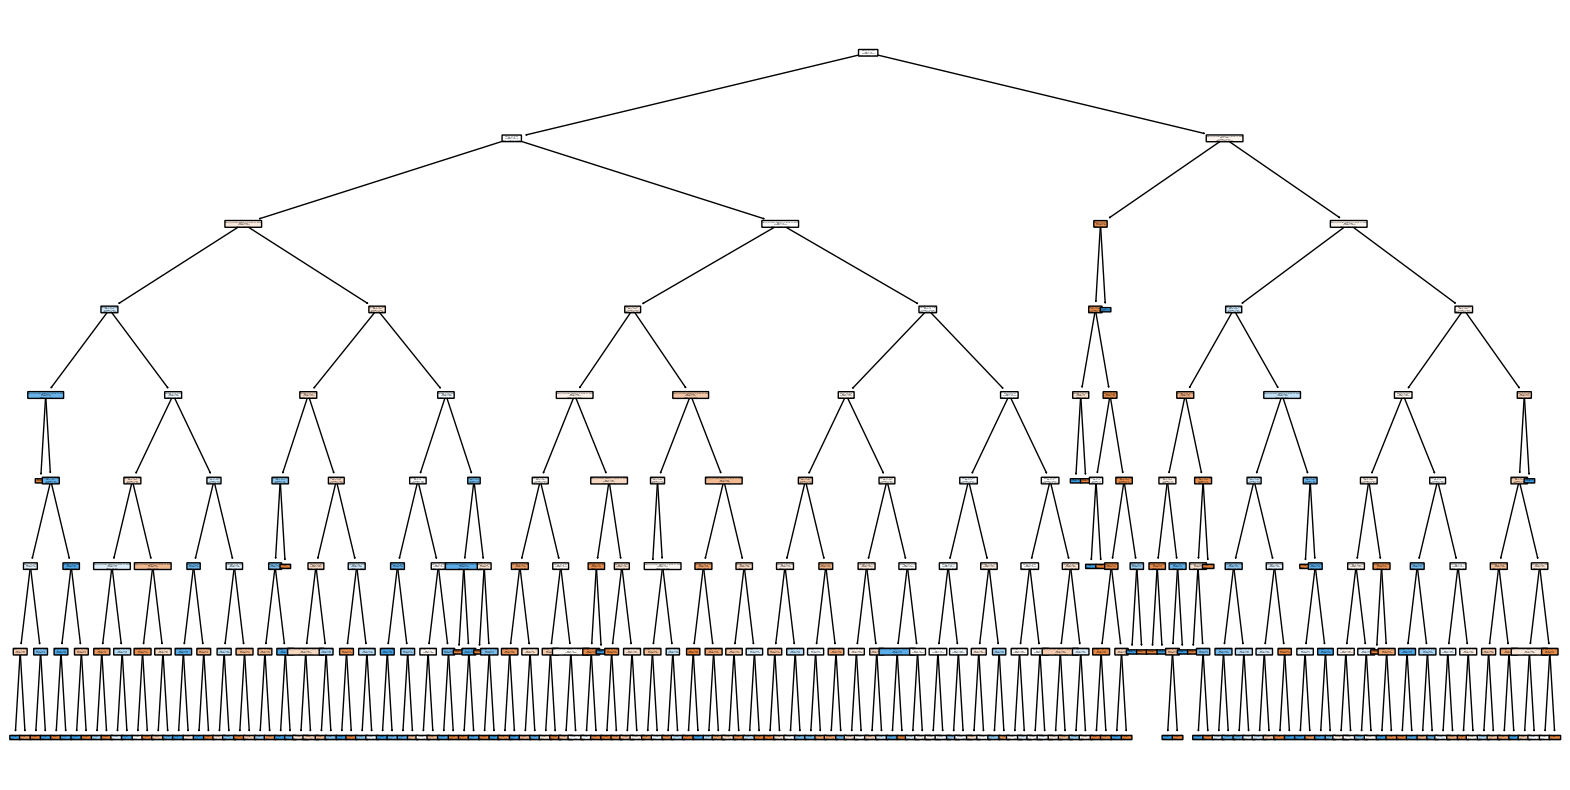

In [74]:
# To view structure of a specific tree in the forest (e.g., first tree)
def print_tree_structure(model,tree_number=0):
    tree = model.estimators_[tree_number]  # Get a specific tree from the forest
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    values = tree.tree_.value
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]
    while stack:
        node, depth = stack.pop()
        node_depth[node] = depth
        is_split_node = children_left[node] != children_right[node]
        if is_split_node:
            stack.append((children_left[node], depth + 1))
            stack.append((children_right[node], depth + 1))
            #print(f"{'  ' * depth}Node {node}: if feature[{feature[node]}] <= {threshold[node]:.2f}")
        else:
            #print(f"{'  ' * depth}Node {node} is a leaf with value {values[node]}")
            is_leaves[node] = True
    print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node with value={value}.".format(
                    space=node_depth[i] * "\t", node=i, value=np.around(values[i], 3)
                )
            )
        else:
            print(
                "{space}node={node} is a split node with value={value}: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                    value=np.around(values[i], 3),
                    #value=values[i],
                )
            )
# Print first tree structure
print("Structure of first tree in the forest:")
#test_model = RandomForestClassifier(**rf_params)
print_tree_structure(model, 0)

# Or use scikit-learn's plot_tree for visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot first tree
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], 
          feature_names=features,  # Your feature names
          filled=True, 
          rounded=True)
plt.show()


ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

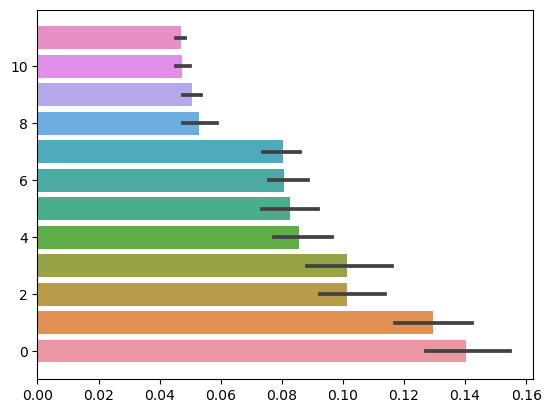

In [19]:
feature_importances = pd.DataFrame([model.feature_importances_ for model in models], columns=features)

sns.barplot(data=feature_importances, orient='h', order=feature_importances.mean().sort_values(ascending=False).index)

## Generate the submission

The same parameters of the RF model are considered. With that we build a new RF model on the entire `train` dataset. The predictions are saved in a `.csv` file.

In [20]:
X_test = test[features]

rf_params['random_state'] = 0
model = RandomForestClassifier(**rf_params)
model.fit(X_train.fillna(0), y_train)
y_pred = model.predict_proba(X_test.fillna(0))[:, 1]

sub = test.copy()
sub['pred'] = y_pred
y_pred = sub.groupby('DATE')['pred'].transform(
    lambda x: x > x.median()).values

submission = pd.Series(y_pred)
submission.index = test.index
submission.name = target

submission.to_csv('./benchmark_qrt.csv', index=True, header=True)

NameError: name 'test' is not defined


The local accuracy is around 51. If we did not overfit, we shall expect something within the range above.

After submitting the benchmark file at https://challengedata.ens.fr, we obtain a public score of 51.31 %.